<a href="https://colab.research.google.com/github/SamyCol/MiwebCHAtGPT/blob/main/comparacion_precipitacion_a%C3%B1os_2000_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

In [101]:
import numpy as np
df = pd.read_csv('/content/data_file.txt', sep="\t")
print(df.head())
print(df.shape)

     # STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
1  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
2  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
3  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
4  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   

   LONGITUDE            DATE  HPCP(cm)  
0 -123.22056  20000101 01:00      0.00  
1 -123.22056  20000101 02:00      0.00  
2 -123.22056  20000101 05:00      0.00  
3 -123.22056  20000101 06:00      0.00  
4 -123.22056  20000101 08:00      0.51  
(23839, 7)


In [102]:
df = np.genfromtxt('/content/data_file.txt', delimiter="\t")
# Convert the NumPy ndarray to a Pandas DataFrame to use .head()
df = pd.DataFrame(df)
print(df.head())
print(df.shape)

    0   1      2         3          4   5     6
0 NaN NaN  107.6  44.12778 -123.22056 NaN  0.00
1 NaN NaN  107.6  44.12778 -123.22056 NaN  0.00
2 NaN NaN  107.6  44.12778 -123.22056 NaN  0.00
3 NaN NaN  107.6  44.12778 -123.22056 NaN  0.00
4 NaN NaN  107.6  44.12778 -123.22056 NaN  0.51
(23839, 7)


In [103]:
#Access the 7th column (index 6) using .iloc[] for integer-based indexing
mean = np.mean(df.iloc[:, 6])
std = np.std(df.iloc[:, 6])
print("Mean= ", mean)
print("Standard Deviation:0 ", std)

Mean=  0.532994253114644
Standard Deviation:0  0.9557358610652827


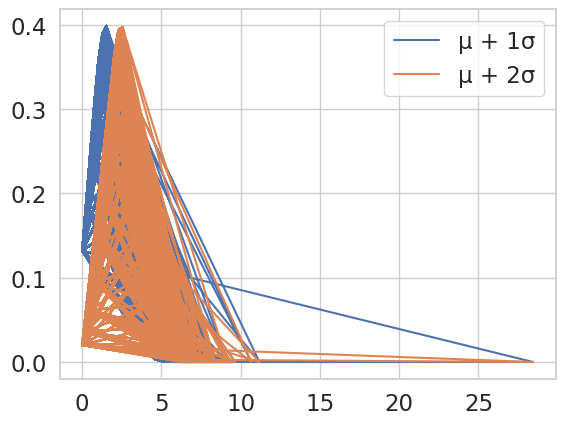

In [104]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + std), label='μ + 1σ')
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + 2 * std), label='μ + 2σ')
plt.legend()
plt.show()

In [105]:
df = pd.read_csv('/content/data_file.txt', sep="\t")
df.columns

Index(['# STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE',
       'DATE', 'HPCP(cm)'],
      dtype='object')

In [106]:
def dateTime(x):
    x = x.split()
    return x[0][:4]+"-"+x[0][4:6]+"-"+x[0][6:8]+" " +x[1]
df["date and time"]=df["DATE"].apply(dateTime)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23839 entries, 0 to 23838
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   # STATION      23839 non-null  object 
 1   STATION_NAME   23839 non-null  object 
 2   ELEVATION      23839 non-null  float64
 3   LATITUDE       23839 non-null  float64
 4   LONGITUDE      23839 non-null  float64
 5   DATE           23839 non-null  object 
 6   HPCP(cm)       23839 non-null  float64
 7   date and time  23839 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.5+ MB


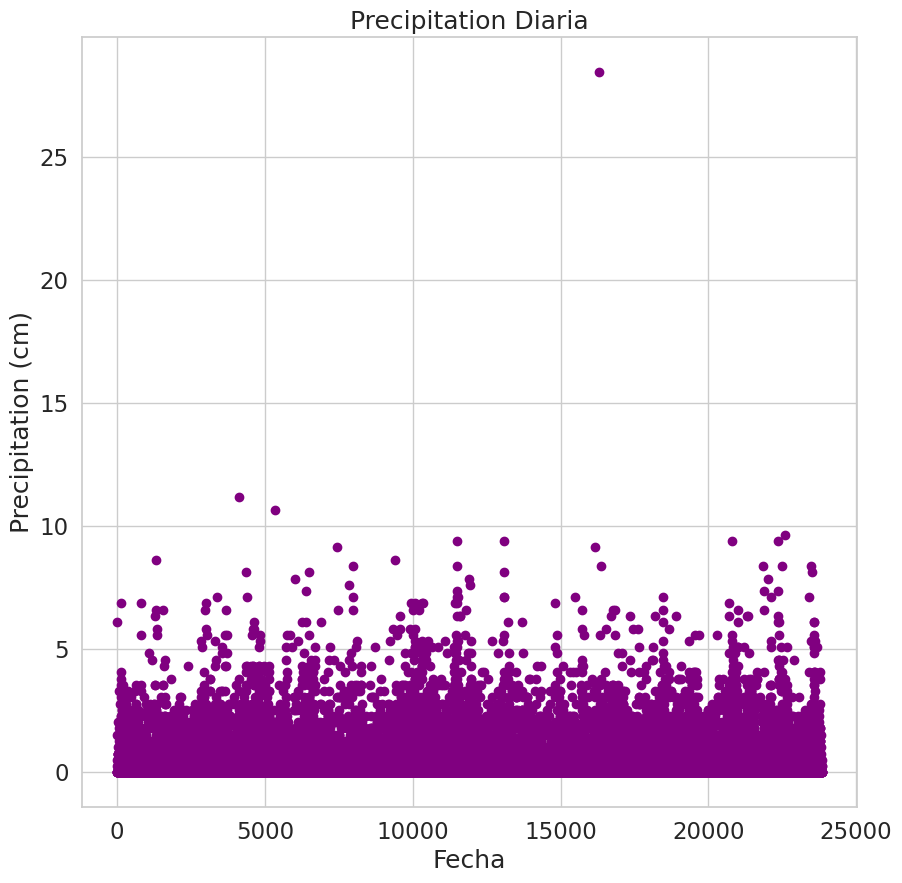

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,
        df["HPCP(cm)"],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Fecha",
       ylabel="Precipitation (cm)",
       title="Precipitation Diaria")

plt.show()

Se modifica el formato fecha y la precipitacion se da en mm

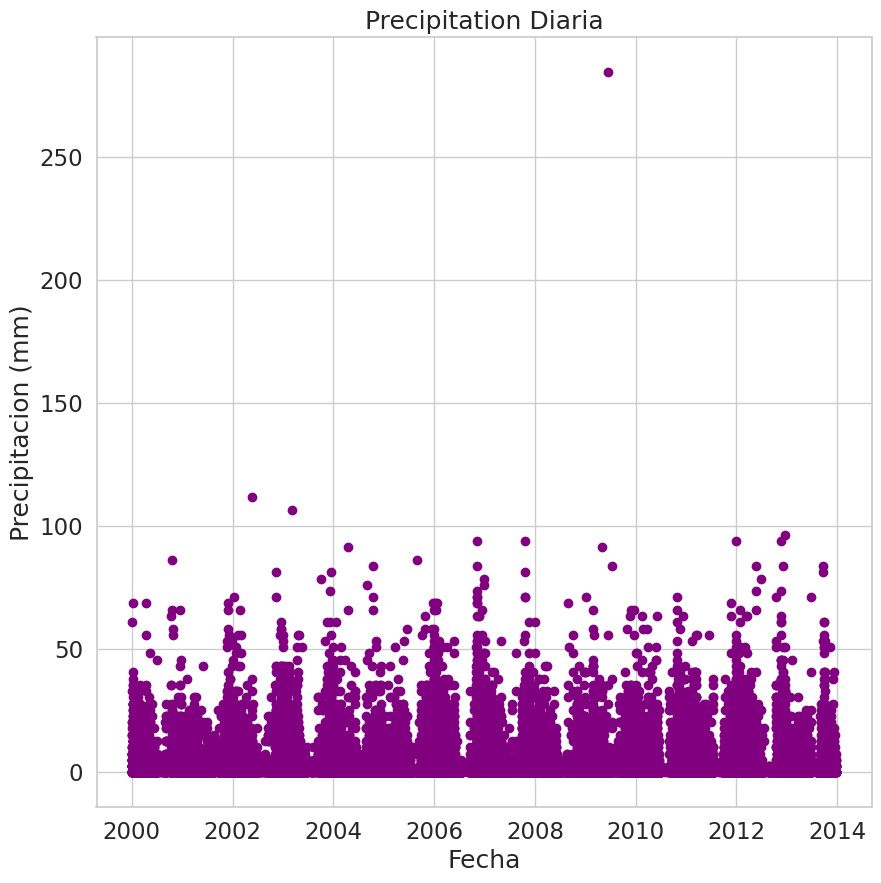

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def dateTime(x):
  x = x.split()
  return x[0][:4]+"-"+x[0][4:6]+"-"+x[0][6:8]+" " +x[1]

df["date and time"] = df["DATE"].apply(dateTime)
df["date and time"] = pd.to_datetime(df["date and time"])

# 2. Multiply "HPCP(cm)" by 10 to convert to mm
df["HPCP(mm)"] = df["HPCP(cm)"] * 10

# 3. Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis using the new column and date format
ax.scatter(df["date and time"],
           df["HPCP(mm)"],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Fecha",
       ylabel="Precipitacion (mm)",
       title="Precipitation Diaria")

plt.show()

In [110]:
df1 = df[df["date and time"].dt.year == 2007]
df2 = df.head(1674)

In [111]:
print("Data of 2000")
df2

Data of 2000


,# STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP(cm),date and time,HPCP(mm)
0,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 01:00,0.00,2000-01-01 01:00:00,0.0
1,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 02:00,0.00,2000-01-01 02:00:00,0.0
2,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 05:00,0.00,2000-01-01 05:00:00,0.0
3,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 06:00,0.00,2000-01-01 06:00:00,0.0
4,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 08:00,0.51,2000-01-01 08:00:00,5.1
...,...,...,...,...,...,...,...,...,...
1669,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20001229 22:00,0.00,2000-12-29 22:00:00,0.0
1670,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20001229 23:00,0.00,2000-12-29 23:00:00,0.0
1671,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20001231 03:00,0.25,2000-12-31 03:00:00,2.5
1672,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20001231 06:00,0.00,2000-12-31 06:00:00,0.0


In [112]:
val = df2["HPCP(cm)"].sum() # sum of data of 2000

#### Conversion el valor de mm to m

In [113]:
final_value = val*0.001
print("Total precipitation en 2000 in metros: ", final_value, "Metros")

Total precipitation en 2000 in metros:  0.86327 Metros


Precipitacion año 2007

In [114]:
df_2007 = df1[df["date and time"].dt.year == 2007]
print(df_2007.head())

         # STATION                     STATION_NAME  ELEVATION  LATITUDE  \
11949  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6   44.1278   
11950  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6   44.1278   
11951  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6   44.1278   
11952  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6   44.1278   
11953  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6   44.1278   

       LONGITUDE            DATE  HPCP(cm)       date and time  HPCP(mm)  
11949  -123.2206  20070101 01:00      0.00 2007-01-01 01:00:00       0.0  
11950  -123.2206  20070101 13:00      0.00 2007-01-01 13:00:00       0.0  
11951  -123.2206  20070101 14:00      0.00 2007-01-01 14:00:00       0.0  
11952  -123.2206  20070101 15:00      0.00 2007-01-01 15:00:00       0.0  
11953  -123.2206  20070102 17:00      0.25 2007-01-02 17:00:00       2.5  


<ipython-input-114-571fe5dded4a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2007 = df1[df["date and time"].dt.year == 2007]


In [115]:
df3 = df1.tail(-11951)
print("Data of 2007")
df3

Data of 2007


,# STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP(cm),date and time,HPCP(mm)


In [116]:
val2 = df_2007["HPCP(cm)"].sum()

In [117]:
final_value2 = val2 * 0.01

In [121]:
print("Total precipitation in 2007 in m: ", final_value2, "Mettros")

Total precipitation in 2007 in m:  8.677000000000001 Mettros
